#### Dự báo quá trình dừng xu thế S&P 500

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import boxcox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [3]:
# Tải dữ liệu và biến đổi logarit
sp500 = pd.read_csv('../Data/sp500.csv', parse_dates=['Date'])[['Date','Close']]
sp500['logarit'] = boxcox(sp500['Close'], lmbda = 0)

In [4]:
# Ước lượng mô hình ARIMA có xu thế tuyến tính
model = ARIMA(sp500.logarit[:-200], order=(2,0,0), trend='ct')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                logarit   No. Observations:                10580
Model:                 ARIMA(2, 0, 0)   Log Likelihood               32424.447
Date:                Thu, 14 Dec 2023   AIC                         -64838.894
Time:                        23:13:27   BIC                         -64802.560
Sample:                             0   HQIC                        -64826.630
                              - 10580                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9994      0.167     29.921      0.000       4.672       5.327
x1             0.0003   2.62e-05     11.745      0.000       0.000       0.000
ar.L1          0.9434      0.004    222.057      0.000       0.935       0.952
ar.L2          0.0556      0.004     13.090      0.000       0.047       0.064
sigma2         0.0001   4.83e-07    263.944      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            313645.00
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                            -1.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

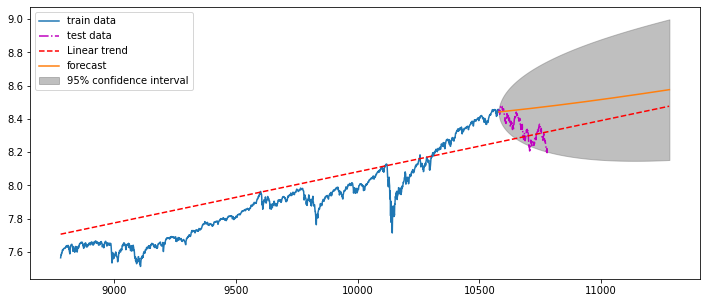

In [5]:
fig, ax = plt.subplots(figsize=(12,5))

# Vẽ dữ liệu (train + test) của chỉ số S&P 500
ax.plot(sp500.logarit[-2000:-200], '-', label = 'train data')
ax.plot(sp500.logarit[-200:], '-.m', label = 'test data')

# Vẽ đường xu thế tuyến tính
period = np.arange(len(sp500)-2000,len(sp500)+500)
trend = lambda t: result.params[0]+result.params[1]*t
ax.plot(period, trend(period), '--', color='red', label='Linear trend')

# Vẽ đường dự báo
fig = plot_predict(result, start=len(sp500)-200, end=len(sp500)+500, ax=ax)